# <font color='blue'>Audit Risk Project: Classification


# Data Pre-processing

In [177]:
#Importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

## Importing Datasets

In [178]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

In [179]:
audit_risk.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,1.0,2.95,0.2,0.590,2,0.2,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,0.2,1.0,44.95,0.6,26.970,2,0.2,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,0.4,2.2,7.79,0.4,3.116,2,0.2,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,0.4,2.2,7.34,0.4,2.936,2,0.2,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,0.2,1.0,1.93,0.2,0.386,2,0.2,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [181]:
trial.count()

Sector_score     776
LOCATION_ID      776
PARA_A           776
SCORE_A          776
PARA_B           776
SCORE_B          776
TOTAL            776
numbers          776
Marks            776
Money_Value      775
MONEY_Marks      776
District         776
Loss             776
LOSS_SCORE       776
History          776
History_score    776
Score            776
Risk             776
dtype: int64

## Exploring Data

In [182]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [183]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


Most columns from the 2 dataframes have similar feature names and also similar description. Some columns are in all capital letters, some have values in multiples of 10. The only columns in **'trial'** that are entirely differrent are **'Loss'** and **'Risk'**.

In [184]:
#Renaming columns
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [185]:
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

In [186]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk_trial
0,3.89,23,4.18,0.6,2.50,0.2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,0.2,4.83,0.2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,0.2,0.23,0.2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,0.2,10.80,0.6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,0.2,0.08,0.2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


## Merging Dataframes

In [187]:
same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [188]:
# Merge two Dataframes  on common columns  using outer join
merged_df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

The dataframes have been succesfully merged.

In [190]:
merged_df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,2,2,2,0,2,2,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,2,2,2,0,2,2,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,2,2,2,0,2,2,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,6,6,2,0,2,2,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,2,2,2,0,2,2,0


## Data Cleaning

In [193]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    810 non-null    float64
 1   LOCATION_ID     810 non-null    object 
 2   PARA_A          810 non-null    float64
 3   Score_A         810 non-null    float64
 4   Risk_A          810 non-null    float64
 5   PARA_B          810 non-null    float64
 6   Score_B         810 non-null    float64
 7   Risk_B          810 non-null    float64
 8   TOTAL           810 non-null    float64
 9   numbers         810 non-null    float64
 10  Score_B.1       810 non-null    float64
 11  Risk_C          810 non-null    float64
 12  Money_Value     809 non-null    float64
 13  Score_MV        810 non-null    float64
 14  Risk_D          810 non-null    float64
 15  District_Loss   810 non-null    int64  
 16  PROB            810 non-null    float64
 17  RiSk_E          810 non-null    flo

Money_Value has 1 missing value.

In [243]:
#Replacing the missing value by the median of the column
merged_df['Money_Value'] = merged_df['Money_Value'].replace('', np.nan)
merged_df['Money_Value'] = merged_df['Money_Value'].replace(np.nan,merged_df.Money_Value.mean())

In [196]:
df = merged_df

In [198]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,2,2,2,0,2,2,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,2,2,2,0,2,2,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,2,2,2,0,2,2,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,6,6,2,0,2,2,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,2,2,2,0,2,2,0


'Detection_Risk' and 'Risk_F' have the same values throughout the columns. Deleting these columns.

In [199]:
df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   Risk_A         810 non-null    float64
 5   PARA_B         810 non-null    float64
 6   Score_B        810 non-null    float64
 7   Risk_B         810 non-null    float64
 8   TOTAL          810 non-null    float64
 9   numbers        810 non-null    float64
 10  Score_B.1      810 non-null    float64
 11  Risk_C         810 non-null    float64
 12  Money_Value    810 non-null    float64
 13  Score_MV       810 non-null    float64
 14  Risk_D         810 non-null    float64
 15  District_Loss  810 non-null    int64  
 16  PROB           810 non-null    float64
 17  RiSk_E         810 non-null    float64
 18  History   

LOCATION_ID has object datatype. However there are numerical values in the column. There must be non-numeric values present.

In [200]:
#Unique values in LOCATION_ID column
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [201]:
print("These are the number of non-numeric values in LOCATION_ID: ", len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] ==  'NUH') | (df["LOCATION_ID"] == 'SAFIDON')]))

These are the number of non-numeric values in LOCATION_ID:  3


Deleting the rows with these 3 values as there is no information about the sequencing of the numbers present in the LOCATION_ID column.

In [202]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  807


Dropping duplicate values if any. Here the rows which intersected with both dataframes get deleted.  

In [203]:
df = df.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  760


In [204]:
#Number of unique values in each columns
for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 42
PARA_A : 362
Score_A : 3
Risk_A : 362
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 470
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 328
Score_MV : 3
Risk_D : 327
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Score : 17
Inherent_Risk : 583
CONTROL_RISK : 11
Audit_Risk : 600
Risk : 2
Marks : 3
MONEY_Marks : 3
District : 3
Loss : 3
LOSS_SCORE : 3
History_score : 3
Risk_trial : 2


# Correlation Matrix

In [205]:
import seaborn as sns
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
Sector_score,1.00,-0.05,-0.21,-0.42,-0.22,-0.13,-0.21,-0.13,-0.15,-0.15,-0.17,-0.16,-0.12,-0.32,-0.11,-0.11,-0.09,-0.13,-0.11,-0.14,-0.33,-0.17,-0.16,-0.09,-0.39,-0.17,-0.32,-0.11,-0.08,-0.09,-0.14,-0.37
LOCATION_ID,-0.05,1.00,-0.01,0.08,-0.00,0.01,0.13,0.01,0.01,0.01,-0.02,-0.02,-0.07,0.11,-0.07,-0.11,-0.00,-0.10,-0.08,-0.05,0.09,-0.05,-0.12,-0.09,0.06,-0.02,0.11,-0.11,0.01,-0.00,-0.05,0.05
PARA_A,-0.21,-0.01,1.00,0.49,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.28,0.45,0.13,0.04,0.12,0.12,0.17,0.42,0.48,0.15,0.22,0.38,0.14,0.28,0.13,0.04,0.04,0.17,0.29
Score_A,-0.42,0.08,0.49,1.00,0.50,0.25,0.57,0.25,0.30,0.24,0.27,0.26,0.20,0.47,0.20,0.09,0.09,0.10,0.18,0.26,0.72,0.32,0.17,0.20,0.62,0.27,0.47,0.09,0.09,0.09,0.26,0.67
Risk_A,-0.22,-0.00,1.00,0.50,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.17,0.43,0.48,0.15,0.22,0.38,0.14,0.29,0.13,0.04,0.04,0.17,0.29
PARA_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.40,0.65,0.19,0.89,0.26,0.23,0.31,0.08,0.04,0.04,0.32,0.16
Score_B,-0.21,0.13,0.36,0.57,0.36,0.35,1.00,0.35,0.38,0.28,0.31,0.30,0.20,0.56,0.20,-0.01,0.09,0.01,0.20,0.31,0.90,0.36,0.12,0.21,0.63,0.31,0.56,-0.01,0.10,0.09,0.31,0.51
Risk_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.40,0.65,0.19,0.89,0.25,0.23,0.31,0.08,0.04,0.04,0.32,0.16
TOTAL,-0.15,0.01,0.27,0.30,0.27,0.99,0.38,0.99,1.00,0.22,0.24,0.23,0.17,0.34,0.17,0.09,0.05,0.09,0.21,0.33,0.43,0.69,0.20,0.89,0.29,0.24,0.34,0.09,0.05,0.05,0.33,0.19
numbers,-0.15,0.01,0.13,0.24,0.13,0.21,0.28,0.21,0.22,1.00,0.91,0.96,0.19,0.45,0.19,0.12,0.03,0.14,0.20,0.21,0.50,0.27,0.23,0.22,0.31,0.91,0.45,0.12,-0.00,0.03,0.21,0.19


Here, there are some interesting correlations. Deleting some variables that are highly correlated (0.8 and more) with each other to avoid overfitting the models and to avoid multicollinearity.

In [206]:
#Keeping just the columns that are correlated with the target variable and not with other independent variables.
df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK',
        'Audit_Risk', 'Risk', 'MONEY_Marks', 'Loss']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks,Loss
Risk_A,1.00,0.16,0.14,0.45,0.12,0.17,0.43,0.15,0.22,0.38,0.29,0.04
Risk_B,0.16,1.00,0.22,0.12,0.08,0.32,0.40,0.19,0.89,0.25,0.31,0.04
Risk_C,0.14,0.22,1.00,0.21,0.15,0.24,0.55,0.25,0.25,0.34,0.49,0.00
Risk_D,0.45,0.12,0.21,1.00,0.03,0.11,0.29,0.07,0.33,0.25,0.39,0.02
RiSk_E,0.12,0.08,0.15,0.03,1.00,0.12,0.23,0.73,0.20,0.41,0.10,0.37
Prob,0.17,0.32,0.24,0.11,0.12,1.00,0.44,0.64,0.43,0.30,0.33,0.10
Score,0.43,0.40,0.55,0.29,0.23,0.44,1.00,0.35,0.33,0.78,0.76,0.16
CONTROL_RISK,0.15,0.19,0.25,0.07,0.73,0.64,0.35,1.00,0.36,0.41,0.22,0.28
Audit_Risk,0.22,0.89,0.25,0.33,0.20,0.43,0.33,0.36,1.00,0.22,0.29,0.05
Risk,0.38,0.25,0.34,0.25,0.41,0.30,0.78,0.41,0.22,1.00,0.69,0.17


# Classification

In [207]:
#Creating a new dataframe for classification by deleting the Audit_Risk column.
class_df = df.drop("Audit_Risk", axis = 1)

In [208]:
classification_X = class_df.drop(["Risk"], axis = 1)
classification_y = class_df["Risk"]

## Classification: Train-Test Split

In [209]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(classification_X, classification_y, 
                                                            test_size = 0.25, random_state = 0)

## Classification: Feature Scaling

In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

# Principal Component Analysis


In [211]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [212]:
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  6


## Classification Models

## KNN Classifier with PCA

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 15]}

grid_knn_clf = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='roc_auc')
grid_knn_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
             scoring='roc_auc')

In [214]:
print("Best Parameters for KNN Classifier with PCA: ", grid_knn_clf.best_params_)

Best Parameters for KNN Classifier with PCA:  {'n_neighbors': 8}


In [215]:
pca_knn = KNeighborsClassifier(n_neighbors=8)
pca_knn.fit(X_train_reduced, y_train)

KNeighborsClassifier(n_neighbors=8)

In [216]:
print("KNN Classifier with PCA Training Score: ", pca_knn.score(X_train_reduced, y_train))
print("KNN Classifier with PCA Testing Score: ", pca_knn.score(X_test_reduced, y_test))

KNN Classifier with PCA Training Score:  0.9771929824561404
KNN Classifier with PCA Testing Score:  0.9421052631578948


In [217]:
pca_report_table_1 = ['KNN Classifier with PCA', 'n_neighbors = 8', 
                      pca_knn.score(X_train_reduced, y_train), pca_knn.score(X_test_reduced, y_test)]

##  SVM Classifier with PCA

In [218]:
from sklearn.svm import SVC

svc = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

grid_svc_clf = GridSearchCV(svc, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='roc_auc')

In [219]:
print("Best Parameters for LinearSVC with PCA: ", grid_svc_clf.best_params_)

Best Parameters for LinearSVC with PCA:  {'C': 100, 'kernel': 'rbf'}


In [220]:
pca_svc = SVC(C= 10, kernel= 'rbf')
pca_svc.fit(X_train_reduced, y_train)

SVC(C=10)

In [221]:
print("SVC with PCA Training Score: ", pca_svc.score(X_train_reduced, y_train))
print("SVC with PCA Testing Score: ", pca_svc.score(X_test_reduced, y_test))

SVC with PCA Training Score:  0.9578947368421052
SVC with PCA Testing Score:  0.9421052631578948


In [222]:
pca_report_table_2 = ['SVC with PCA', 'C =10, kernel= rbf', 
                      pca_svc.score(X_train_reduced, y_train), pca_svc.score(X_test_reduced, y_test)]

## Logistic Regression with PCA

In [223]:
from sklearn.linear_model import LogisticRegression

pca_lr = LogisticRegression(random_state=0)

param_grid = {'penalty':['l1', 'l2']}

grid_log_clf = GridSearchCV(pca_lr , param_grid, cv = 5, return_train_score=True, scoring='roc_auc')
grid_log_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ['l1', 'l2']}, return_train_score=True,
             scoring='roc_auc')

In [224]:
print("Best Parameters for Logistic Regression with PCA: ", grid_log_clf.best_params_)

Best Parameters for Logistic Regression with PCA:  {'penalty': 'l2'}


In [225]:
pca_lr = LogisticRegression(penalty= 'l2')
pca_lr.fit(X_train_reduced, y_train)

LogisticRegression()

In [226]:
print("Logistic Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train))
print("Logistic Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test))

Logistic Regression with PCA Training Score:  0.9298245614035088
Logistic Regression with PCA Testing Score:  0.9157894736842105


In [227]:
pca_report_table_3 = ['Logistic Regression with PCA', 'penalty = l2', 
                      pca_lr.score(X_train_reduced, y_train), pca_lr.score(X_test_reduced, y_test)]

## Decision Tree Classifier with PCA

In [228]:
#Base model
dt = DecisionTreeClassifier(random_state = 0)

#model param
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}

#grid model
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

#train grid model
dt_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15]})

In [229]:
print("Best Parameters for Decision Tree Classifier: ", dt_grid.best_params_)

Best Parameters for Decision Tree Classifier:  {'max_depth': 5}


In [230]:
pca_dt = DecisionTreeClassifier(max_depth= 5, random_state= 0)
pca_dt.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [231]:
print("Decision Tree Classifier with PCA Training Score: ", pca_dt.score(X_train_reduced, y_train))
print("Decision Tree Classifier with PCA Testing Score: ", pca_dt.score(X_test_reduced, y_test))

Decision Tree Classifier with PCA Training Score:  0.9964912280701754
Decision Tree Classifier with PCA Testing Score:  0.9578947368421052


In [232]:
pca_report_table_4 = ['Decision Tree Classifier with PCA', 'max_depth: 5', 
                      pca_dt.score(X_train_reduced, y_train), pca_dt.score(X_test_reduced, y_test)]

## Generating a Report table: PCA
For comparing all the models, let's create a table and a plot.

In [233]:
pca_report_table = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2,
             pca_report_table_3,
             pca_report_table_4))).transpose()

In [234]:
pca_report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
pca_report_table.index = pca_report_table['Model Name']

In [235]:
pca_report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN Classifier with PCA,KNN Classifier with PCA,n_neighbors = 8,0.977193,0.942105
SVC with PCA,SVC with PCA,"C =10, kernel= rbf",0.957895,0.942105
Logistic Regression with PCA,Logistic Regression with PCA,penalty = l2,0.929825,0.915789
Decision Tree Classifier with PCA,Decision Tree Classifier with PCA,max_depth: 5,0.996491,0.957895


In [236]:
report_table_without_pca = pd.read_csv('Classification Report Table without PCA.csv')
report_table_without_pca.head(5)

,Model Name,Model Name.1,Model Parameter,Training Score,Testing Score
0,KNN Classifier,KNN Classifier,n_neighbors = 7,0.977193,0.952632
1,SVC with PCA,SVC with PCA,"C =100, kernel= linear",0.987719,0.963158
2,Logistic Regression,Logistic Regression,penalty = l1,0.963158,0.957895
3,Decision Tree Classifier,Decision Tree Classifier,max_depth: 9,1.000000,0.989474


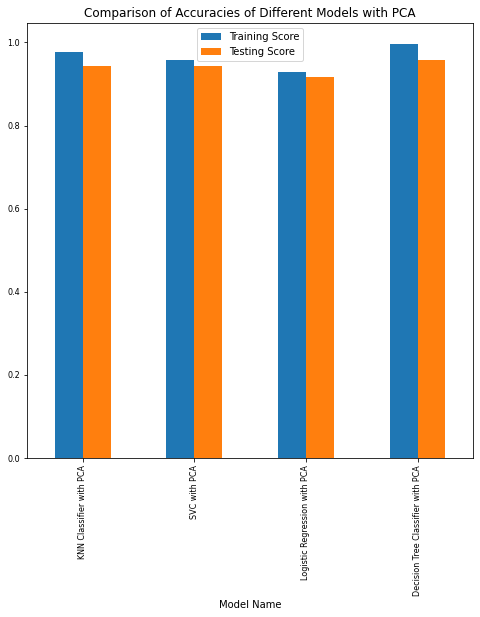

In [237]:
import matplotlib.pyplot as plt

ax = pca_report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models with PCA", figsize=(8, 8), fontsize = 8)
plt.show()

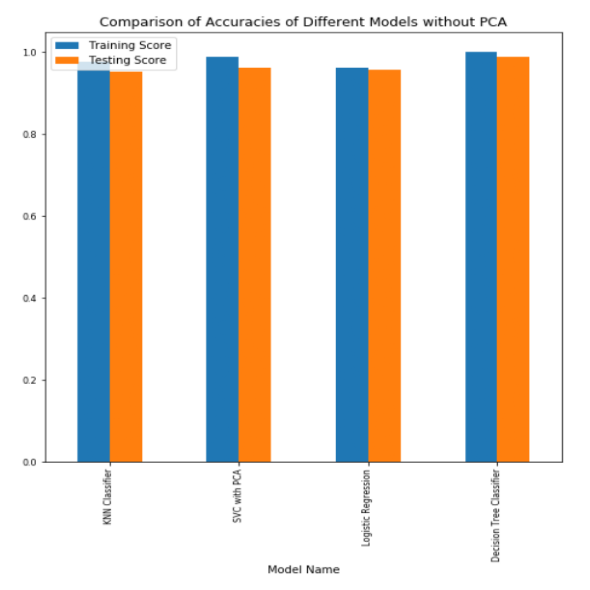

In [238]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
img=mpimg.imread('Classification Report Table without PCA.PNG')
ax.imshow(img, aspect='auto')

## Neural Network Model

In [239]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
np.random.seed(0)

model = Sequential()
model.add(Dense(10, input_dim = 10, activation = 'sigmoid'))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 40, batch_size = 50)

Epoch 1/40
12/12 [==============================] - 0s 6ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 2/40
12/12 [==============================] - 0s 2ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 3/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 4/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 5/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 6/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 7/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 8/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 9/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 10/40
12/12 [==============================] - 0s 1ms/step - loss: 6.1159 - accuracy: 0.6035
Epoch 11/40
12/12 [

In [240]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred >= 0.5 , 1, 0)
y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred >= 0.5 , 1, 0)
print("NN Train Score: ",accuracy_score(y_train, y_train_pred))
print("NN Test Score: ", accuracy_score(y_test, y_test_pred))

NN Train Score:  0.6035087719298246
NN Test Score:  0.5894736842105263


# Model Selection

Amongst all the models Decision Tree model with PCA seems to be the best model. 

In [241]:
print("Decision Tree with PCA Training Score: ", pca_dt.score(X_train_reduced, y_train))
print("Decision Tree with PCA Testing Score: ", pca_dt.score(X_test_reduced, y_test))

Decision Tree with PCA Training Score:  0.9964912280701754
Decision Tree with PCA Testing Score:  0.9578947368421052


In [242]:
y_predicted = pca_dt.predict(X_test_reduced)
print("Predicted value for 1st testing row: ", y_predicted[0])
print("Original value for 1st testing row: ", y_test.values[0])
print("")
print("Predicted value for 7th testing row: ", y_predicted[7])
print("Original value for 7th testing row: ", y_test.values[7])

Predicted value for 1st testing row:  0.0
Original value for 1st testing row:  0.0

Predicted value for 7th testing row:  1.0
Original value for 7th testing row:  1.0


The model works pretty well on the test data as well.

**Training and testing score of around 0.95 was achieved using Decision Tree.** 